# Systematic Trading - Deep Learning
---
 
 
- Copyright (c) Imperial College London, 2024. All rights reserved

- Author: Lukas Gonon <l.gonon@imperial.ac.uk>

- Platform: Tested on Windows 10 with Python 3.8



## Getting started with neural networks 

### Implementing Neural Networks in Keras

First, we import <b>Keras</b> (this requires that <b>TensorFlow</b> is installed):


<small> (If you choose to work with Anaconda Navigator to manage your Python installation, a configuration that can be easily installed is as follows: create a new environment with Python 3.8 and install the packages matplotlib, tensorflow and pydot. Then you can launch jupyter in that environment.)</small>

In [1]:
import tensorflow.keras as keras

Second, for later use we import <b>NumPy</b> and <b>matplotlib</b> (and set a nicer plotting style).

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

We now specify a feedforward neural network with, for example,  $L=3$, $d=N_0=2$, $N_1=100$, $N_2=100$, $N_3=1$, $\varrho_1(x)=\varrho_2(x)=\mathrm{ReLU}(x)=\max(x,0)$, $\varrho_3(x)=x$ as follows. A shorthand notation that we will use for such a network is
$$
f \in \mathcal{N}_3(2,100,100,1;\mathrm{ReLU},\mathrm{ReLU},\mathrm{Id}).
$$

Specifying such a neural network can be done using the <code>Sequential</code> model of Keras by:

In [8]:
f = keras.Sequential([
    keras.layers.InputLayer(input_shape=(2,)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="linear")
])

An alternative, but equivalent, way of doing the same using the <code>add</code> method is:

In [4]:
f = keras.Sequential()
f.add(keras.layers.InputLayer(input_shape=(2,)))
f.add(keras.layers.Dense(100, activation="relu"))
f.add(keras.layers.Dense(100, activation="relu"))
f.add(keras.layers.Dense(1, activation="linear"))

The <code>summary</code> method lets us summarise the specified architecture of the network $f$ and its parameters.

In [5]:
f.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,501
Trainable params: 10,501
Non-trainable params: 0
_________________________________________________________________


We can also visualise the architecture using the function <code>plot_model</code> in <code>keras.utils</code>. (Which is particularly helpful when we have built a model with complicated routings.)

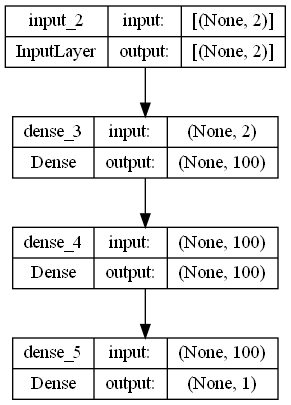

In [6]:
keras.utils.plot_model(f, show_shapes=True)

We can remove the final layer of the network using the <code>pop</code> method:

In [7]:
f.pop()

We should then get $f \in \mathcal{N}_2(2,100,100;\mathrm{ReLU},\mathrm{ReLU})$, which we can verify with the <code>summary</code> method.

In [8]:
f.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
Total params: 10,400
Trainable params: 10,400
Non-trainable params: 0
_________________________________________________________________


Let us however <code>add</code> the deleted layer back to the network $f$: 

In [9]:
f.add(keras.layers.Dense(1, activation="linear"))

We can study the layers of the network using the <code>get_layer</code> method. If we are, for example, interested in extracting the layer $\boldsymbol{L}_1(\boldsymbol{x}) = W^1\boldsymbol{x} + \boldsymbol{b}^1$, $\boldsymbol{x} \in \mathbb{R}^2$, we can do it as follows (remember that in Python indexation starts from zero):

In [10]:
L_1 = f.get_layer(index=0)

We can inspect the weight matrix $W^1$ and bias vector $\boldsymbol{b}^1$ using the <code>get_weights</code> method.

In [11]:
print(L_1.get_weights())

[array([[ 0.01201203,  0.16589022, -0.05351131, -0.13377021, -0.0395944 ,
         0.13074735,  0.22112238,  0.03197357, -0.12945503, -0.06022751,
        -0.00900069, -0.12798598,  0.12364244,  0.02382684, -0.23150891,
        -0.03344454, -0.20211132, -0.20073757, -0.182123  ,  0.19407278,
        -0.21394677, -0.13872534,  0.22848922,  0.15870795,  0.15043312,
        -0.04715669, -0.18890867, -0.12032526, -0.10898456,  0.09491003,
        -0.04762033,  0.18519872, -0.15774104,  0.12854186, -0.23210365,
         0.07294369, -0.08503588,  0.03803438,  0.1408669 ,  0.05801994,
        -0.01214649, -0.15283817, -0.08369324,  0.04410508,  0.02001154,
        -0.12388705,  0.02513242,  0.21605286, -0.20074902,  0.02798551,
         0.07163817,  0.03338635, -0.03863178,  0.03561059,  0.07845592,
        -0.03200926, -0.0274009 ,  0.1886127 , -0.04533145, -0.16220918,
         0.00196472,  0.10081303, -0.04961935,  0.16834927, -0.18412843,
         0.06438726, -0.07937337, -0.11096108,  0.

We have not trained $f$ yet, so $W^1 \in \mathbb{R}^{100 \times 2}$ and $\boldsymbol{b}^1 \in \mathbb{R}^{100}$ are at their initialiser values. By default, <b>Keras</b> uses the random <i>Glorot</i> initialiser for weights and just zeros for biases. We could also specify weights manually using the <code>set_weights</code> method.

The method <code>predict</code> lets us compute $f(\boldsymbol{x})$ for given input $\boldsymbol{x} \in \mathbb{R}^2$. The method expects here the input in the shape <code>(N,2)</code>, where <code>N</code> is the number of different values of $\boldsymbol{x}$ for which we want $f(\boldsymbol{x})$ to be computed. Let us just take <code>N=1</code> and try with $\boldsymbol{x} = (1,0)$.

In [12]:
x=np.array([[4,5],[3,4],[0.,0.]])
print(x)
print(f.predict(x))

[[4. 5.]
 [3. 4.]
 [0. 0.]]
1/1 [==============================] - 1s 682ms/step
[[-0.93591464]
 [-0.7397258 ]
 [ 0.        ]]


In [13]:
x_test1 = np.reshape((1,0), (1,2))
print(f.predict(x_test1))

1/1 [==============================] - 0s 221ms/step
[[-0.14136638]]


To gain some insight into what an untrained ReLU network looks like, let us use <code>predict</code> to plot $f(x,1)$ for $x \in [-1,1]$.

63/63 [==============================] - 0s 3ms/step


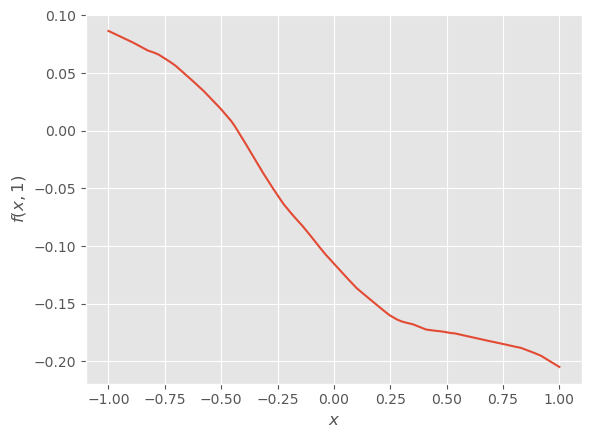

In [14]:
x_grid = np.linspace(-1, 1, num=2001)
x_ones = np.ones((2001, ))
xb = np.stack((x_grid, x_ones), -1) 
y_out = f.predict(xb)
plt.plot(x_grid, y_out)
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x,1)$")
plt.show()

To prepare $f$ for training, we can use the <code>compile</code> method to specify the loss function $\ell$ and the optimisation method. For example, we can set $\ell$ to be squared loss to be optimised with <i>SGD</i> by:

In [15]:
f.compile(optimizer="sgd", loss="mean_squared_error")

With training data, consisting of <code>N</code> samples, supplied in arrays <code>X</code> and <code>Y</code> with shapes <code>(N,2)</code> and  <code>(N,1)</code>, respectively, we could now train $f$ with minibatch size $100$ for $10$ epochs, say, by <code>f.fit(X, Y, batch_size=100, epochs=10)</code>. <b>We will return to this in the application we look at now.</b>

## Trading signal construction from limit order book data

In this notebook we use deep learning to predict high-frequency price changes of a US stock. Price predictions are based on limit order book data.

#### What is a limit order book ?

- Electronic trading platform, used by financial markets worldwide.
- Platform brings together all buyers and sellers.
- Traders submit (upload) orders to the market. An order is: buy/sell $N$ assets *either* immediately (at best possible price) *or* at at a specfied price, if and when possible.
- Orders to trade immediately are called *market orders*
- Orders to wait until the specified price is reached are called *limit orders*.
- Best bid price: buy limit order with highest price
- Best ask price: sell limit order with lowest price
- Each new order changes the state of the limit order book and may affect the **mid-price** (average between best bid and best ask price).

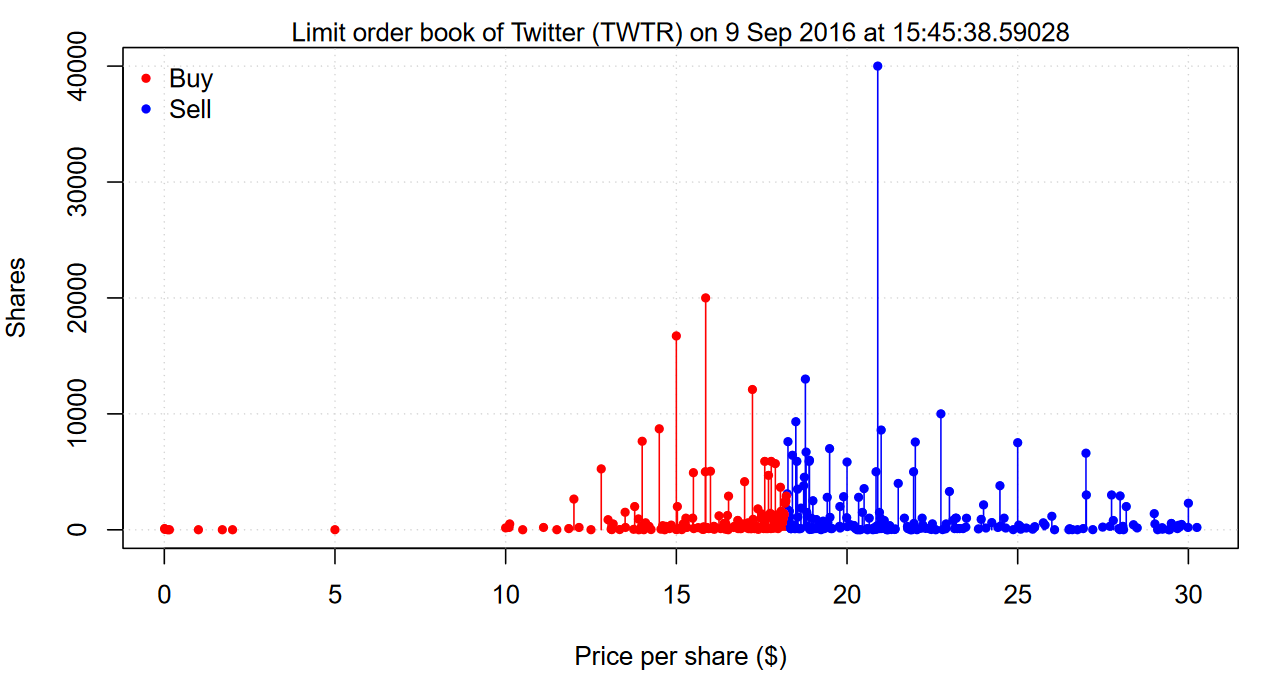

In [17]:
from IPython.display import Image
Image(filename='TWTR-limit-order-book.png')
#![title](Figures/TWTR-limit-order-book.pdf)

#### Loading and examinig the limit order book data

The data for training and testing is contained in two CSV files _Data_A_ and _Data_B_.

_Data_A_ contains a $100\,000 \times 22$ array with the following information:

- Column 1: the label --- midprice change direction (we define midprice $=\frac{\text{bid price}+\text{ask price}}{2}$) coded as follows: $0$ means down, $1$ means up.
- Columns 2--22: the features, all recorded just prior to the midprice change corresponding to the label.

    - Column 2: Sell side, limit order book level 1, Price (in US dollars multiplied by $10,000$), that is, the _ask price_.
    - Column 3: Sell side, limit order book level 1, Volume (in number of shares).
    - Column 4: Buy side, limit order book level 1, Price, that is, the _bid price_.
    - Column 5: Buy side, limit order book level 1, Volume.
    - Column 6: Sell side, limit order book level 2, Price.
    - Column 7: Sell side, limit order book level 2, Volume.
    - Column 8: Buy side, limit order book level 2, Price.
    - Column 9: Buy side, limit order book level 2, Volume.
    - Column 10: Sell side, limit order book level 3, Price.
    - Column 11: Sell side, limit order book level 3, Volume.
    - Column 12: Buy side, limit order book level 3, Price.
    - Column 13: Buy side, limit order book level 3, Volume.
    - Column 14: Sell side, limit order book level 4, Price.
    - Column 15: Sell side, limit order book level 4, Volume.
    - Column 16: Buy side, limit order book level 4, Price.
    - Column 17: Buy side, limit order book level 4, Volume.
    - Columns 18--22: five previous midprice change directions _0_/_1_-coded like the labels).


The rows of this file have been _randomly drawn_ from a larger data set covering the period 1 August -- 30 October 2023, and they can be treated as $100\,000$ independent samples. No _time series structure_ can be recovered from the data.


$\textit{Data_B}$ contains a $10\,000 \times 22$ array with data drawn in the same way. We will use it to assess the out of sample performance.

In this notebook we will do:
- Build and train a _binary classifier_ that predicts the label in the first column of _Data_A_. 
- Use the binary classifier to predict the labels missing from _Data_B_.

We start by importing relevant packages.

In [20]:
import tensorflow.keras as keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## For illustration purposes we fix the random seed here. What happens when we don't?
keras.utils.set_random_seed(125)

Next we read the data and print information to ensure it has been properly loaded.

In [21]:
directory = 'C:\\Users\\lukas\\Downloads\\SummerSchoolData\\data_full\\'

In [23]:
# Read Data_A csv file into pandas DataFrame
data = pd.read_csv(directory+"Data_A.csv", header=None)

# Add names to the columns for easier identification
data.columns=["label","askl1","vola1","bidl1","volb1","askl2",
            "vola2","bidl2","volb2","askl3","vola3","bidl3","volb3",
            "askl4","vola4","bidl4","volb4",
            "m1","m2","m3","m4","m5"]

# Print the first few rows of the data as well as information 
display(data.head())
print(data.info())

,label,askl1,vola1,bidl1,volb1,askl2,vola2,bidl2,volb2,askl3,...,volb3,askl4,vola4,bidl4,volb4,m1,m2,m3,m4,m5
0,1,428900.0,1,428700.0,200,429000.0,100,428500.0,300,429100.0,...,300,429200.0,200,428300.0,100,0,1,0,1,0
1,1,427100.0,100,427000.0,100,427200.0,940,426900.0,100,427300.0,...,100,427400.0,700,426700.0,100,0,1,0,1,0
2,1,511300.0,100,511200.0,129,511400.0,500,511100.0,200,511500.0,...,300,511600.0,200,510900.0,300,0,1,1,0,0
3,0,415600.0,200,415400.0,100,415700.0,100,415300.0,100,415800.0,...,600,415900.0,300,415100.0,1020,0,1,1,0,1
4,0,506600.0,300,506500.0,100,506700.0,100,506300.0,200,506800.0,...,1099,506900.0,214,506100.0,699,0,0,1,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   label   100000 non-null  int64  
 1   askl1   100000 non-null  float64
 2   vola1   100000 non-null  int64  
 3   bidl1   100000 non-null  float64
 4   volb1   100000 non-null  int64  
 5   askl2   100000 non-null  float64
 6   vola2   100000 non-null  int64  
 7   bidl2   100000 non-null  float64
 8   volb2   100000 non-null  int64  
 9   askl3   100000 non-null  float64
 10  vola3   100000 non-null  int64  
 11  bidl3   100000 non-null  float64
 12  volb3   100000 non-null  int64  
 13  askl4   100000 non-null  float64
 14  vola4   100000 non-null  int64  
 15  bidl4   100000 non-null  float64
 16  volb4   100000 non-null  int64  
 17  m1      100000 non-null  int64  
 18  m2      100000 non-null  int64  
 19  m3      100000 non-null  int64  
 20  m4      100000 non-null  int64  
 21  m5      100

Split the data into features and labels.

In [24]:
x_train_full = data.drop("label",axis=1)
y_train_full = np.array(data["label"])

In [25]:
# Check how x_train_full looks like:
x_train_full

,askl1,vola1,bidl1,volb1,askl2,vola2,bidl2,volb2,askl3,vola3,...,volb3,askl4,vola4,bidl4,volb4,m1,m2,m3,m4,m5
0,428900.0,1,428700.0,200,429000.0,100,428500.0,300,429100.0,100,...,300,429200.0,200,428300.0,100,0,1,0,1,0
1,427100.0,100,427000.0,100,427200.0,940,426900.0,100,427300.0,300,...,100,427400.0,700,426700.0,100,0,1,0,1,0
2,511300.0,100,511200.0,129,511400.0,500,511100.0,200,511500.0,200,...,300,511600.0,200,510900.0,300,0,1,1,0,0
3,415600.0,200,415400.0,100,415700.0,100,415300.0,100,415800.0,200,...,600,415900.0,300,415100.0,1020,0,1,1,0,1
4,506600.0,300,506500.0,100,506700.0,100,506300.0,200,506800.0,239,...,1099,506900.0,214,506100.0,699,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,429000.0,400,428800.0,500,429100.0,300,428700.0,700,429200.0,900,...,655,429300.0,300,428500.0,400,1,0,1,1,1
99996,413600.0,100,413500.0,500,413700.0,611,413400.0,457,413800.0,400,...,400,413900.0,300,413200.0,800,0,1,0,1,0
99997,381900.0,401,381800.0,100,382000.0,705,381700.0,800,382100.0,724,...,400,382200.0,400,381500.0,400,1,0,1,0,0
99998,443000.0,100,442900.0,29,443100.0,300,442800.0,100,443200.0,300,...,400,443300.0,800,442600.0,200,0,1,0,1,0


#### Question: Have a look at the data above. Do you see anything that we should be careful with?

----

The different features have different orders of magnitude (prices are of order $100'000$, volumes of order $100$). To make sure this does not create any issues we normalize the data.
We also set asside part of the data for validating. These data points are not used for training, but instead they allow us to assess how well the trained network performs out-of-sample.

In [26]:
# The index at which we split between training and validation data.
split_ind = 80000

# Split the data into training and validation data.
x_train = x_train_full[:split_ind]
y_train = y_train_full[:split_ind]
x_val = x_train_full[split_ind:]
y_val = y_train_full[split_ind:]

# Compute means and standard deviations for each feature
means = x_train.mean(0)
stds = x_train.std(0)

# Normalize training and validation data by the same scaling.
x_train = (x_train-means)/stds
x_val = (x_val-means)/stds

We are now ready to build and train our first deep neural network. We start with a first baseline model.

In [27]:
# Initialize the neural network and add hidden layers with relu activation function and sigmoid output.
f = keras.Sequential()
f.add(keras.layers.Dense(100,activation="relu",input_shape=(x_train.shape[1],)))
f.add(keras.layers.Dense(200,activation="relu"))
f.add(keras.layers.Dense(1,activation="sigmoid"))

# Specify the learning rate, the optimizer, loss function and the metrics monitored during the training process.
learning_rate = 0.1
f.compile(optimizer=keras.optimizers.Adam(
    learning_rate=learning_rate),loss="binary_crossentropy",metrics="accuracy")

# Carry out training. Specify how often we pass through the entire training data set (number of epochs), 
# the number of samples used in each gradient step (batch size) and also specify the validation data.
history = f.fit(x_train,y_train,epochs=40,batch_size=128,validation_data=(x_val,y_val))

Epoch 1/40
625/625 [==============================] - 5s 6ms/step - loss: 0.6229 - accuracy: 0.6468 - val_loss: 0.5634 - val_accuracy: 0.6602
Epoch 2/40
625/625 [==============================] - 3s 4ms/step - loss: 0.5619 - accuracy: 0.6701 - val_loss: 0.5666 - val_accuracy: 0.6597
Epoch 3/40
625/625 [==============================] - 3s 5ms/step - loss: 0.5683 - accuracy: 0.6569 - val_loss: 0.5742 - val_accuracy: 0.6492
Epoch 4/40
625/625 [==============================] - 3s 5ms/step - loss: 0.5705 - accuracy: 0.6521 - val_loss: 0.5798 - val_accuracy: 0.6244
Epoch 5/40
625/625 [==============================] - 3s 5ms/step - loss: 0.5709 - accuracy: 0.6517 - val_loss: 0.5589 - val_accuracy: 0.6460
Epoch 6/40
625/625 [==============================] - 3s 4ms/step - loss: 0.5985 - accuracy: 0.6403 - val_loss: 0.5876 - val_accuracy: 0.6556
Epoch 7/40
625/625 [==============================] - 2s 4ms/step - loss: 0.5728 - accuracy: 0.6511 - val_loss: 0.5668 - val_accuracy: 0.6487
Epoch 

In [31]:
# Return the validation accuracy.
pred = f.predict(x_val,verbose = 0)
pred = [int(prob>0.5) for prob in pred]
res = [int(pred[i]==y_val[i]) for i in range(len(y_val))]
print(f"The validation accuracy is: {sum(res)/len(res)}")

The validation accuracy is: 0.6633


Next we introduce a customized plotting function to visually examine how training has progressed.

In [32]:
# Auxiliary plotting function 
def training_plot(history):
    plt.figure(figsize=(14,6))

    plt.subplot(1, 2, 1)
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, "b-", label="Training loss")
    plt.plot(epochs, val_loss, "g-", label="Validation loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, "b-", label="Training accuracy")
    plt.plot(epochs, val_acc, "g-", label="Validation accuracy")
    plt.title("Training and validation accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.show();

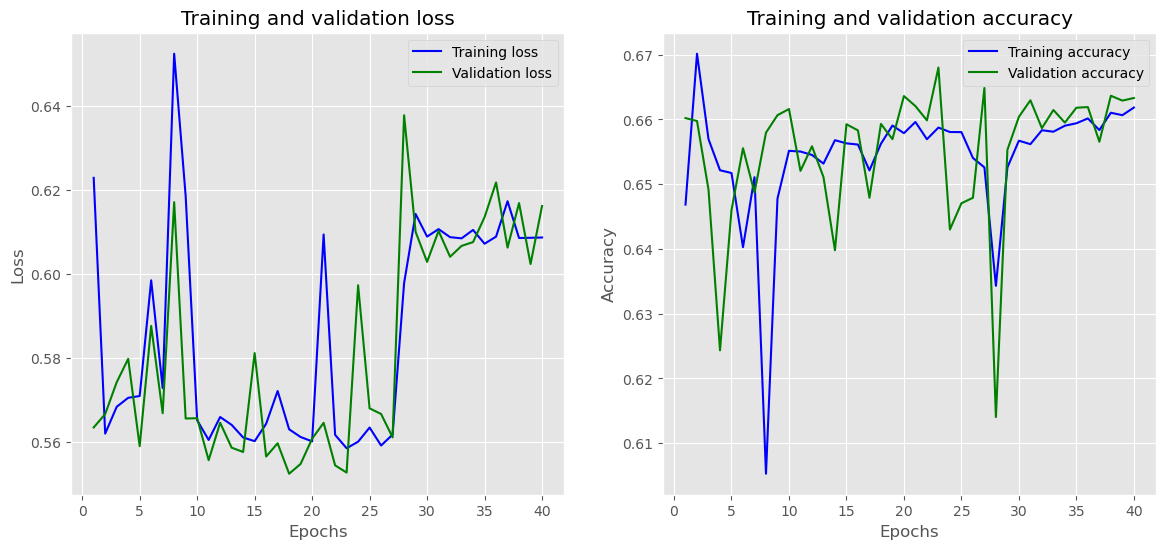

In [33]:
# Plot to see if overfitting occured. 
training_plot(history)

#### Question: Have a look at the plots visualizing the training process. What do you observe? How could you resolve it?

_____

The training process is still very noisy. This indicates that the learning rate that we are using is probably too high.   First let us decrease the learning rate. Intuitively, this means that we may need to train longer, but that the training process is more sensitive and thus potentially we may find a better local minimum.

Epoch 1/40
625/625 [==============================] - 5s 6ms/step - loss: 0.5472 - accuracy: 0.7214 - val_loss: 0.4979 - val_accuracy: 0.7544
Epoch 2/40
625/625 [==============================] - 3s 5ms/step - loss: 0.4933 - accuracy: 0.7560 - val_loss: 0.4922 - val_accuracy: 0.7569
Epoch 3/40
625/625 [==============================] - 3s 4ms/step - loss: 0.4860 - accuracy: 0.7576 - val_loss: 0.4912 - val_accuracy: 0.7534
Epoch 4/40
625/625 [==============================] - 2s 4ms/step - loss: 0.4827 - accuracy: 0.7606 - val_loss: 0.4821 - val_accuracy: 0.7612
Epoch 5/40
625/625 [==============================] - 3s 4ms/step - loss: 0.4797 - accuracy: 0.7603 - val_loss: 0.4845 - val_accuracy: 0.7596
Epoch 6/40
625/625 [==============================] - 3s 4ms/step - loss: 0.4781 - accuracy: 0.7611 - val_loss: 0.4813 - val_accuracy: 0.7605
Epoch 7/40
625/625 [==============================] - 3s 5ms/step - loss: 0.4769 - accuracy: 0.7627 - val_loss: 0.4810 - val_accuracy: 0.7631
Epoch 

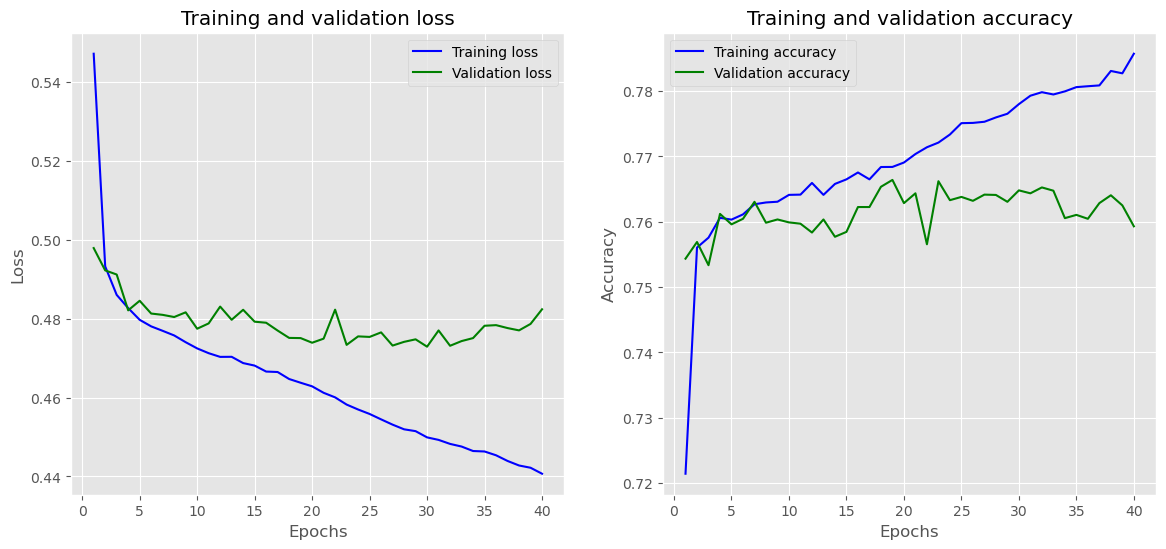

In [34]:
# For the neural network we use the same setup as above.
f = keras.Sequential()
f.add(keras.layers.Dense(100,activation="relu",input_shape=(x_train.shape[1],)))
f.add(keras.layers.Dense(200,activation="relu"))
f.add(keras.layers.Dense(1,activation="sigmoid"))

# Use a smaller learning rate than before, then train and plot as above.
learning_rate = 0.001
f.compile(optimizer=keras.optimizers.Adam(
    learning_rate=learning_rate),loss="binary_crossentropy",metrics="accuracy")
history = f.fit(x_train,y_train,epochs=40,batch_size=128,validation_data=(x_val,y_val))
training_plot(history)

In [35]:
# Return the validation accuracy.
pred = f.predict(x_val,verbose = 0)
pred = [int(prob>0.5) for prob in pred]
res = [int(pred[i]==y_val[i]) for i in range(len(y_val))]
print(f"The validation accuracy is: {sum(res)/len(res)}")

The validation accuracy is: 0.7593


We see that the appropriate choice of learning rate has allowed us to significantly improve the validation accuracy. 
####  Have a look at the new plots of the training process. What do you observe?
____

From the graph we see that after a while we started to overfit! There are two things we can do against this:

- Introduce a dropout layer
- Stop training earlier


Let us try the first option and see if we are able to improve the validation accuracy even further.

Epoch 1/40
625/625 [==============================] - 5s 6ms/step - loss: 0.5691 - accuracy: 0.7043 - val_loss: 0.4976 - val_accuracy: 0.7556
Epoch 2/40
625/625 [==============================] - 3s 5ms/step - loss: 0.5063 - accuracy: 0.7486 - val_loss: 0.4864 - val_accuracy: 0.7571
Epoch 3/40
625/625 [==============================] - 3s 5ms/step - loss: 0.4948 - accuracy: 0.7531 - val_loss: 0.4816 - val_accuracy: 0.7607
Epoch 4/40
625/625 [==============================] - 3s 4ms/step - loss: 0.4889 - accuracy: 0.7566 - val_loss: 0.4805 - val_accuracy: 0.7610
Epoch 5/40
625/625 [==============================] - 4s 6ms/step - loss: 0.4855 - accuracy: 0.7569 - val_loss: 0.4784 - val_accuracy: 0.7606
Epoch 6/40
625/625 [==============================] - 4s 6ms/step - loss: 0.4830 - accuracy: 0.7595 - val_loss: 0.4786 - val_accuracy: 0.7609
Epoch 7/40
625/625 [==============================] - 3s 5ms/step - loss: 0.4799 - accuracy: 0.7610 - val_loss: 0.4762 - val_accuracy: 0.7635
Epoch 

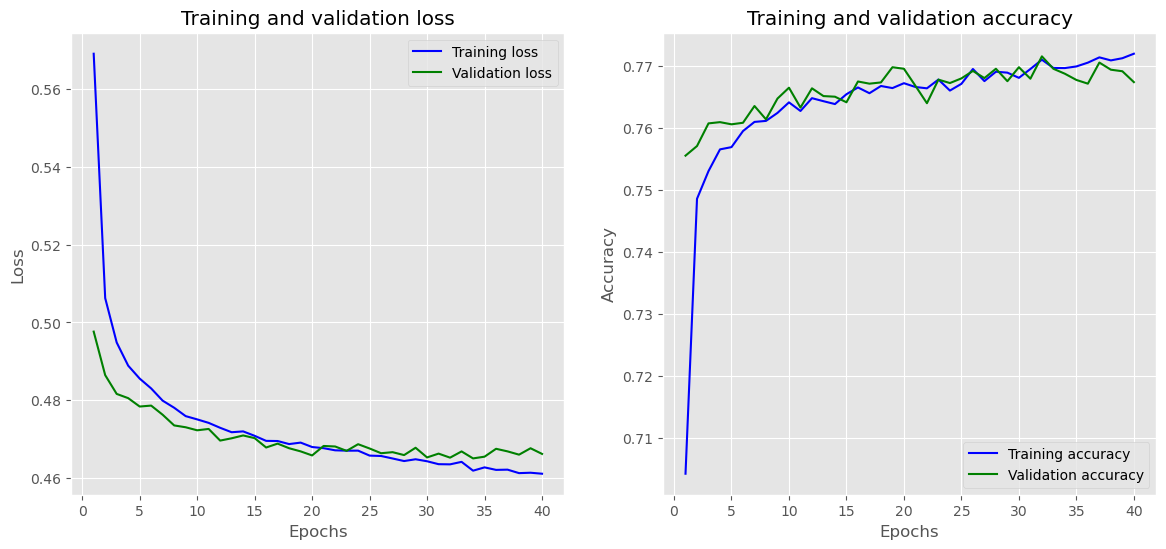

In [36]:
# We now use the same setup as above, but introduced dropout layers in between. 
f = keras.Sequential()
f.add(keras.layers.Dense(100,activation="relu",input_shape=(x_train.shape[1],)))
f.add(keras.layers.Dropout(0.2)),
f.add(keras.layers.Dense(200,activation="relu"))
f.add(keras.layers.Dropout(0.2)),
f.add(keras.layers.Dense(1,activation="sigmoid"))

# Training works as before.
learning_rate = 0.001
f.compile(optimizer=keras.optimizers.Adam(
    learning_rate=learning_rate),loss="binary_crossentropy",metrics="accuracy")
history = f.fit(x_train,y_train,epochs=40,batch_size=128,validation_data=(x_val,y_val))
# Plot to see if there is still overfitting. 
training_plot(history)

In [37]:
# Return the validation accuracy.
pred = f.predict(x_val,verbose = 0)
pred = [int(prob>0.5) for prob in pred]
res = [int(pred[i]==y_val[i]) for i in range(len(y_val))]
print(f"The validation accuracy is: {sum(res)/len(res)}")

The validation accuracy is: 0.7674


We see that we have been able to further improve the validation accuracy. Most of the overfitting has been mitigated. 

#### Challenge: can you further improve the validation accuracy? 

Possible points you may try:

- Features (use only a selection)
- Learning rate
- Activation function
- Number of layers
- Dropout layers
- Batch normalization layers

Finally we now assess the out-of-sample performance of your network.

In [38]:
# Read the test data and label it appropriately. 

df_test = pd.read_csv(directory+"Data_B.csv", header=None)
df_test.columns=["label","askl1","vola1","bidl1","volb1","askl2",
            "vola2","bidl2","volb2","askl3","vola3","bidl3","volb3",
            "askl4","vola4","bidl4","volb4",
            "m1","m2","m3","m4","m5"]

# Split into labels (not known in principle, but here we give them to assess the out-of-sample performance) and features.

x_test = df_test.drop("label",axis=1)
y_test = np.array(df_test["label"])

# Apply the same normalization as for training.

x_test = (x_test-means)/stds

In [39]:
# Assess the out-of-sample accuracy. 
pred_test = f.predict(x_test,verbose = 0)
pred_test = [int(prob>0.5) for prob in pred_test]
res_test = [int(pred_test[i]==y_test[i]) for i in range(len(y_test))]
print(f"The out-of-sample accuracy is: {sum(res_test)/len(res_test)}")

The out-of-sample accuracy is: 0.7751


## Comparison to linear regression

In [42]:
import sklearn
from sklearn.linear_model import LogisticRegression


reg = LogisticRegression(fit_intercept=True).fit(x_train, y_train)

print('Train Accuracy: ',reg.score(x_train, y_train))
print('Test Accuracy: ',reg.score(x_test, y_test))

Train Accuracy:  0.7196125
Test Accuracy:  0.7173


We see that neural networks achieve a higher accuracy. This is because the non-linearity of neural networks allows to capture non-linear dependencies. 

Classically, one would try to add non-linear functions of the features into the regression in order to get higher accuracy. For example, one could include the squares of all features. 

In [48]:
x_train_augmented = np.concatenate([x_train,x_train**2],axis=1)
x_test_augmented = np.concatenate([x_test,x_test**2],axis=1)

In [49]:
reg = LogisticRegression(fit_intercept=True).fit(x_train_augmented, y_train)

print('Train Accuracy: ',reg.score(x_train_augmented, y_train))
print('Test Accuracy: ',reg.score(x_test_augmented, y_test))

Train Accuracy:  0.73305
Test Accuracy:  0.7331


C:\Users\lukas\.conda\envs\tf2\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We see that this leads to an imporved accuracy. However, we have still not achieved the same accuracy as with neural networks.